# Direct KNN using the whole image as a data point

In [ ]:
# Requirements that need to be met must go here.
!pip install sklearn
from sklearn import datasets
from numpy.random import RandomState
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=a72e24676f9fdfaafe66138398a12a05186ab2d5b2ec50e0cf4b1902aeea89e0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


We can import the dataset using the code given below.

In [ ]:
rng = RandomState(0)

X, y = datasets.fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
print(f'The shape of the input image series: {X.shape} \n')
print(f'The shape of the input image target series: {y.shape} \n')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
The shape of the input image series: (400, 4096) 

The shape of the input image target series: (400,) 



Visualisation of the Olivetti Dataset
- Visualisation code obtained from the scikitlearn Faces dataset decompositions page and adopted to fit our data.

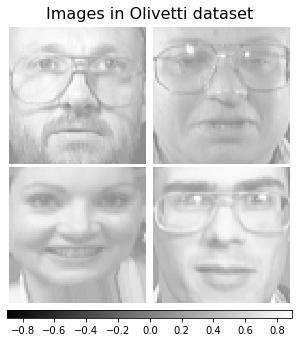

In [ ]:
n_row, n_col = 2, 2
n_components = n_row * n_col
image_shape = (64, 64)

fig, axs = plt.subplots(
  nrows=n_row,
  ncols=n_col,
  figsize=(2.0 * n_col, 2.3 * n_row),
  facecolor="white",
  constrained_layout=True,
)
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
fig.set_edgecolor("black")
fig.suptitle("Images in Olivetti dataset", size=16)
for ax, vec in zip(axs.flat, X):
  vmax = max(vec.max(), -vec.min())
  im = ax.imshow(
      vec.reshape(image_shape),
      cmap=plt.cm.gray,
      interpolation="nearest",
      vmin=-vmax,
      vmax=vmax,
  )
  ax.axis("off")

fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()


Dividing the training and test Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model Initialization:

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = model.score(X_test, y_test)
print(f'The model achieved an accuracy of {round(acc*100,2)}%')

The model achieved an accuracy of 68.75%


Hyperparameter training for the value of k, the value of 2 is the default used above.

Setting the value of k_neighbours to 1 gives the highest accuracy of 88.75%


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


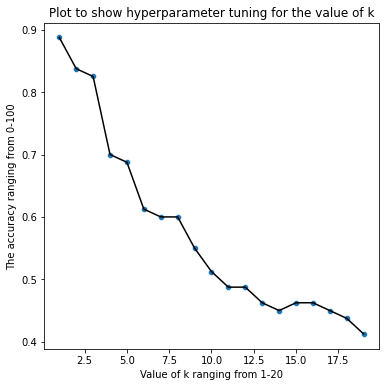

In [ ]:
acc_array =[]

for i in range(1,20):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  # predictions = model.predict(X_test)
  acc = model.score(X_test, y_test)
  acc_array.append(acc)
  # print(f'The model achieved an accuracy of {round(acc*100,2)}%')
# print(acc_array)
plt.figure(figsize=(6,6))
acc_array = np.array(acc_array)
sns.scatterplot([i for i in range(1,20)], acc_array)
sns.lineplot([i for i in range(1,20)], acc_array, color = 'black' )
plt.xlabel("Value of k ranging from 1-20")
plt.ylabel("The accuracy ranging from 0-100")
plt.title("Plot to show hyperparameter tuning for the value of k")
max_acc = np.argmax(acc_array)+1
print(f'Setting the value of k_neighbours to {max_acc} gives the highest accuracy of {round(acc_array[max_acc-1]*100,2)}%')

The confusion matrix for the most accurate model

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = model.score(X_test, y_test)
print(f'The model achieved an accuracy of {round(acc*100,2)}%')
plt.figure(figsize=(10,10))
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm)
plt.xlabel("")
plt.ylabel("")
plt.title("")
# Add axis labels

NameError: ignored

Precision, Recall, and F1 Scores for the model

In [ ]:
# scores = metrics.precision_recall_fscore_support(predictions, y_test)
# precision = scores[0]
# recall = scores[1]
# f_score = scores[2]
# support = scores[3]
# precision.shape
# print(precision)
# print(recall)
# print(f_score)


[0.5  1.   0.25 0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   0.25]
[1.   1.   1.   0.   0.   1.   1.   1.   1.   0.5  0.5  1.   1.   1.
 0.5  1.   1.   1.   1.   1.   1.   1.   0.5  1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.75 1.   0.5 ]
[0.66666667 1.         0.4        0.         0.         1.
 1.         1.         1.         0.66666667 0.66666667 1.
 1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.85714286 1.         0.33333333]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Value plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inverse Precision Values for all classes')

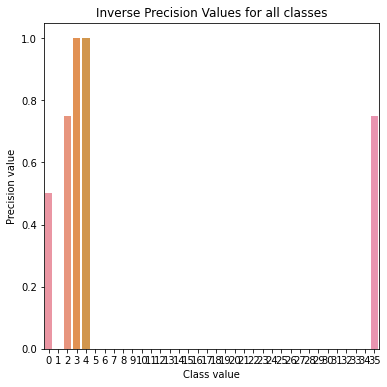

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot([i for i in range(0,precision.shape[0])], 1-precision)
plt.xlabel("Class value")
plt.ylabel("Precision value")
plt.title("Inverse Precision Values for all classes")

Recall Value plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inverse Recall Values for all classes')

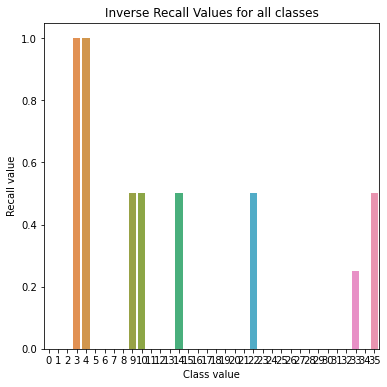

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot([i for i in range(0,recall.shape[0])], 1-recall)
plt.xlabel("Class value")
plt.ylabel("Recall value")
plt.title("Inverse Recall Values for all classes")

f_score Value plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inverse f_score Values for all classes')

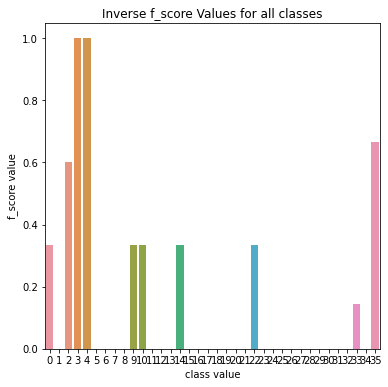

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot([i for i in range(0,f_score.shape[0])], 1-f_score)
plt.xlabel("class value")
plt.ylabel("f_score value")
plt.title("Inverse f_score Values for all classes")